# 2017/19 SWaT Data Analysis
Due to the amount of memory consumed in keeping both the dataframes and numpy arrays in the same Notebook. The analysis and ML will be performed in this notebook. The data required can be loaded using numpy and pickle.

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timezone
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.features import RadViz

## Load preprocessed data


In [2]:
data2017_arr = np.load('data2017_arr.npy')
data2019_arr = np.load('data2019_arr.npy')

In [22]:
data_full_arr = np.load('data_full_df.npy')

In [3]:
"""
This code is taken straight from: https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file/32216025
"""

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [23]:
#unique_vals contains mapping from string features to numbers
unique_vals = load_obj("unique_vals")
features = load_obj("features")

In [24]:
y = data_full_arr[:, -1]
X = data_full_arr[:, 2:]
X = X[:, :-1]
features_red = features[2:-1]

print(X.shape)
print(y.shape)
print("features shape: " + str(len(features_red)))

(6806361, 67)
(6806361,)
features shape: 67


In [5]:
y_data2019 = data2019_arr[:, -1]
y_data2017 = data2017_arr[:, -1]

X_data2019 = data2019_arr[:, 2:]
X_data2019 = X_data2019[:, :-1]
X_data2017 = data2017_arr[:, 2:]
X_data2017 = X_data2017[:, :-1]

X_concat = np.concatenate((X_data2017, X_data2019), axis=0)
y_concat = np.concatenate((y_data2017, y_data2019), axis=0)
#remove time and classification
features_red = features[2:-1]
print("X Shape: " + str(X_concat.shape))
print("y shape: " + str(y_concat.shape))
print("features shape: " + str(len(features_red)))

X Shape: (6806361, 45)
y shape: (6806361,)
features shape: 45


In [25]:
features_to_remove = ["IdleTime", "SrcAddr", "DstAddr"]
indexes_to_remove = []
for f in features_to_remove:
    indexes_to_remove.append(features_red.index(f))
    
removed_features = [x for x in features_red if x not in features_to_remove]

In [26]:
X_red = np.delete(X, indexes_to_remove, 1)
print(X_red.shape)

(6806361, 64)


## This performs the standard Classification
Currently only using Decision Tree. The amount of data means that classifiers like SVM just won't work. <br>
Need to decide how I want to split the data, currently cross_val_score completely messes the data around taking it out of context (but then regardless of whether it's taken out of context - a classifier will not be interpreting it in its context). 

In [32]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import matthews_corrcoef, make_scorer
h = .02  # step size in the mesh

names = [#"Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", 
         #"Random Forest", #"Neural Net", "AdaBoost",
         #"Naive Bayes", "QDA"
        ]

classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #MLPClassifier(alpha=1, max_iter=1000),
    #AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
    ]


# iterate over classifiers
mcc = make_scorer(matthews_corrcoef)
scores = []
for name, clf in zip(names, classifiers):
    
    rcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
    scores.extend(cross_val_score(clf, X_red, y, cv=rcv, scoring="precision"))
    
    #clf.fit(X_data2019, y_data2019)
    #score = clf.score(X_data2017, y_data2017)
    
    print(name + ": " + str(np.mean(scores)) + " +- " + str(np.var(scores)))
    print(scores)



KeyboardInterrupt: 

In [46]:
print(unique_vals.keys())
need_hyphenating = ["State", "Cause"]
for key in need_hyphenating:
    valsList = list(unique_vals[key.lower()].keys())
    for val in valsList:
        ind = removed_features.index(val)
        removed_features[ind] = key + "-" + val

dict_keys(['ips', 'cause', 'state', 'flgs', 'dir'])


In [49]:
categorical_features = [x for x in removed_features if "-" in x]
categorical_features

['Flg-e',
 'Flg-g',
 'Flg-i',
 'Flg-s',
 'Flg-r',
 'Flg-d',
 'Flg-U',
 'Flg-&',
 'Flg-A',
 'Flg-*',
 'Flg-*2',
 'Cause-Start',
 'Cause-Status',
 'State-ACC',
 'State-CON',
 'State-ECO',
 'State-FIN',
 'State-INT',
 'State-MHR',
 'State-NNS',
 'State-NRS',
 'State-REQ',
 'State-RST',
 'State-URN',
 'State-URP']

## Decision Tree Structure Extracter
This is taken straight from: https://planspace.org/20151129-see_sklearn_trees_with_d3/ <br>
It takes a trained decision tree and extracts its structure into a form that can be visualised 

In [8]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node


clf = DecisionTreeClassifier()
clf.fit(X_concat, y_concat)
node = rules(clf, features_red, ["Benign", "Malicious"])

In [11]:
import json

with open('rules.json', 'w') as f:
    f.write(json.dumps(node))

In [53]:
import json
def generator_1(clf, features, labels,original_features, node_index=0,side=0):
  
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
        node['size'] = sum( clf.tree_.value[node_index, 0]  )   
        node['side'] = 'left' if side == 'l' else 'right'                      
    else:

        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['pred'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
                                      
        node['side'] = 'left' if side == 'l' else 'right'                              
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        
        if ('_-_' in feature) and (feature not in original_features):
            node['name'] =  '{} = {}'.format(feature.split('_-_')[0], feature.split('_-_')[1] )
            node['type'] = 'categorical'
        else:
            node['name'] = '{} > {}'.format(feature, round(threshold,2) )
            node['type'] = 'numerical'
        
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        
        node['size'] = sum (clf.tree_.value[node_index, 0])
        node['children'] = [generator_1(clf, features, labels, original_features, right_index,'r'),
                            generator_1(clf, features, labels, original_features, left_index,'l')]
                            
        
    return node



def generator_2(clf, features, labels,original_features, categorical_features, node_index=0,side=0,prev_index=0):

    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['pred'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
                                      
        node['side'] = 'left' if side == 'l' else 'right'                              
        feature = features[clf.tree_.feature[prev_index]]
        threshold = clf.tree_.threshold[prev_index]
        
            
        if node_index == 0:
            node["name"] = 'Root >'
        elif feature in categorical_features:
            
            node['name'] =  '{} = {}'.format(feature.split('-')[0], feature.split('-')[1] ) if side == 'r' else '{} != {}'.format(feature.split('-')[0], feature.split('-')[1] )  
            node['type'] = 'categorical'
        else:
            node['name'] = '{} > {}'.format(feature, round(threshold,2) ) if side == 'r' else '{} <= {}'.format(feature, round(threshold,2) ) 
            node['type'] = 'numerical'
        
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        
        node['size'] = sum (clf.tree_.value[node_index, 0])
           
    else:

        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['pred'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
                                      
        node['side'] = 'left' if side == 'l' else 'right'                              
        feature = features[clf.tree_.feature[prev_index]]
        threshold = clf.tree_.threshold[prev_index]
        
            
        if node_index == 0:
            node["name"] = 'Root >'
        elif feature in categorical_features:
            
            node['name'] =  '{} = {}'.format(feature.split('-')[0], feature.split('-')[1] ) if side == 'r' else '{} != {}'.format(feature.split('-')[0], feature.split('-')[1] )  
            node['type'] = 'categorical'
        else:
            node['name'] = '{} > {}'.format(feature, round(threshold,2) ) if side == 'r' else '{} <= {}'.format(feature, round(threshold,2) ) 
            node['type'] = 'numerical'
        
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        
        node['size'] = sum (clf.tree_.value[node_index, 0])
        node['children'] = [generator_2(clf, features, labels, original_features, categorical_features, right_index,'r',node_index),
                            generator_2(clf, features, labels, original_features, categorical_features, left_index,'l',node_index)]
                            
        
    return node
    
    


clf = DecisionTreeClassifier()
clf.fit(X_red, y)

numeric_features = [x for x in removed_features if x not in categorical_features]

#44io=generator_1(clf, features_red,["benign", "malicious"],features_red)


#with open('structureC1.json', 'w') as outfile:
#    json.dump(io, outfile, indent=4)
    
    
io=generator_2(clf, removed_features, ["Normal", "Malicious"],removed_features, categorical_features)


with open('structureC2.json', 'w') as outfile:
    json.dump(io, outfile, indent=4)

In [32]:
X_concat[:, features_red.index("IdleTime")].shape

(6806361,)

## Simple Inbuilt Feature Importance
This just fits classifier(s) to all the data multiple times and notes down the feature importances for each feature (it doesn't preserve direction - absolute values are used). This allows us to see which features and most influential in a classifier's decision making process

In [28]:
from sklearn.tree import DecisionTreeClassifier
"""
Get inbuilt feature importance 100 times due to small variations in importance
"""
def use_inbuilt_feature_imp(claf, names, X, y):
    feature_imp_dict = {}
    for name, clf in zip(names, claf):
        for ip in range(0,100):
            clf.fit(X, y)
            sorted_importances = []
            index =0
            try:
                for i in clf.feature_importances_:
                    sorted_importances.append((index, i))
                    index+=1
            except AttributeError:
                for i in clf.coef_[0]:
                    sorted_importances.append((index, i))
                    index+=1
            sorted_importances.sort(key = lambda tup : tup[1], reverse=True)
            feature_imp_dict[name + str(ip)] = sorted_importances
    return feature_imp_dict

clf=[DecisionTreeClassifier()]
names = ["Decision Tree"]

feature_imp_dict = use_inbuilt_feature_imp(clf, names, X_red, y)

In [29]:
import math

"""
Sort by feature importance for each classifier
"""
def sort_inbuilt_feature_imp(feature_ranks):
    for clf, res in feature_ranks.items():
        res.sort(key=lambda tup: abs(tup[1]), reverse=True)
        #print(abs(res[0][1]))
        feature_ranks[clf] = res
    return feature_ranks
        #print(res)
"""
Takes sorted feature importance dicts and replaces the score with a rank 
"""
def replace_score_with_rank(feature_ranks):
    ranks = {}
    for clf, result in feature_ranks.items():
        result_ranks = []
        for i in range(0, len(result)):
            if result[i][1] == 0.0:
                element = (result[i][0], len(result)-1)
            else:   
                element = (result[i][0], i)
            result_ranks.append(element)
        ranks[clf] = result_ranks
    return ranks

"""
Gets averages for inbuilt feature classification (as that was run 100 times for each classifier to accomadate for
any variations)
"""
def get_averages(feature_imp_dict, classifier):
    average_feature_imp = {}
    average_feature_list = []
    keysSeen = 0
    firstTime = True
    for key, value in feature_imp_dict.items():
        if classifier in key:
            if firstTime:
                #print(key)
                firstTime=False
            keysSeen +=1
            for tup in value:
                if tup[0] in average_feature_imp: 
                    average_feature_imp[tup[0]] += tup[1]
                else:
                    average_feature_imp[tup[0]] = tup[1]
    for key, value in average_feature_imp.items():
        average_feature_list.append((key, value/keysSeen))
    average_feature_list.sort(key=lambda tup : abs(tup[1]), reverse=True)
    return average_feature_list

def getAveragesForAllClfs(feature_imp_dict, clfs):
    average_feature_imp_dict = {}
    for clf in clfs:
        average_feature_imp_dict[clf] = get_averages(feature_imp_dict, clf)
    return average_feature_imp_dict

feature_imp_dict = sort_inbuilt_feature_imp(feature_imp_dict)
#feature_rank_dict =  replace_score_with_rank(feature_imp_dict)
average_feature_rank_dict = getAveragesForAllClfs(feature_imp_dict, ["Decision Tree"])

index = 0
for name, features in average_feature_rank_dict.items():
    index = 0
    print("")
    print(name)
    for feat in features:
        #print(hook_vocab_combined[feat[0]] + ": " + str(feat[1]))
        print(removed_features[feat[0]] + ": " +  str(feat[1]))
        index+=1



Decision Tree
Offset: 0.288310403551883
Dport: 0.26163585726994
Flg-*: 0.23557036655904418
Flg-e: 0.17058543785310115
sIpId: 0.008536004883205647
Sport: 0.007540573910004753
DstLoad: 0.005063461318217492
dMeanPktSz: 0.002034756459609676
SrcRate: 0.0014652888214903442
SrcLoad: 0.001405074032722222
TcpRtt: 0.0013578921759575056
sMeanPktSz: 0.001356068242150775
Rate: 0.0011823087934037754
Load: 0.0011439422850347033
DstRate: 0.001124276565054545
Mean: 0.0010259109388706718
Min: 0.0010122375796877386
Dur: 0.0010121507647385742
RunTime: 0.0010110281835747099
Sum: 0.0010028526817357731
Max: 0.0010019037695894243
FIN: 0.0007481523557617869
pLoss: 0.0006908249867219676
AckDat: 0.000689976345430404
SynAck: 0.000681811044462731
TotBytes: 0.000504578960976442
SrcBytes: 0.00036100962128423757
DstBytes: 0.0003347279288290087
TotPkts: 0.0002245063579237562
DstPkts: 0.00021273304197341723
SrcPkts: 0.00020224952211049112
SrcLoss: 0.0001969620406028059
DstLoss: 0.00015798558142647183
Loss: 0.000154919

In [52]:
np.unique(X_concat[:, 0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

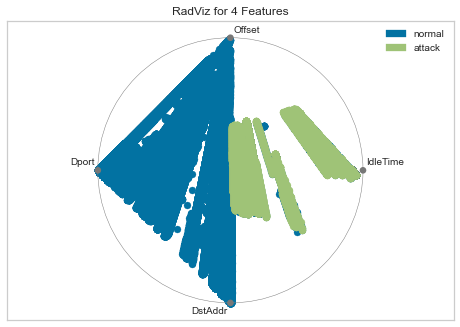

In [10]:
"""
Generates a Radial Visualisation. Takes the number of features to display
and the classifier. Displays the top n (where n is no_of_features) features
ranked by inbuilt feature importance
"""
def generateRadviz(no_of_features, classifier):
    features_indices = [x[0] for x in average_feature_rank_dict[classifier][:no_of_features]]
    feature_names = [features_red[x[0]] for x in average_feature_rank_dict[classifier][:no_of_features]]
    X_vis = X_concat[:, features_indices]
    classes=["normal", "attack"]
    visualizer = RadViz(classes=classes, features=feature_names)
    visualizer.fit(X_vis, y_concat)           
    visualizer.transform(X_vis)        
    visualizer.show()
    
generateRadviz(4, "Decision Tree")
    


In [46]:
import squarify
unique_addresses = np.unique(X_concat[:, features_red.index("DstAddr")])
addr_to_idle = {}
for addr in unique_addresses:
    Addr_X = X_concat[X_concat[:, features_red.index("DstAddr")]==addr]
    addr_sum = np.sum(Addr_X[:, features_red.index("IdleTime")])
    addr_to_idle[addr] = addr_sum

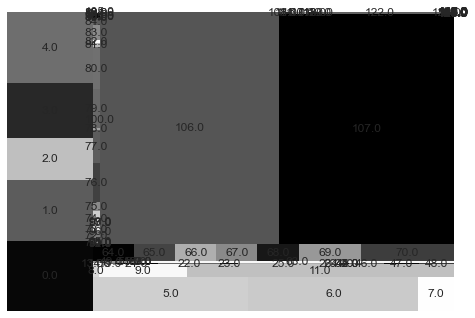

In [49]:
squarify.plot(sizes=addr_to_idle.values(), label=addr_to_idle.keys())
plt.axis('off')
plt.show()

## Streaming Classifier
This is more experimental. It uses a streaming classifier which continues to learn as it is presented with more data (these are particularly useful for large quantities of data and real-life applications). Not sure I'll use it as it's not easy to obtain feature importances.

<IPython.core.display.Javascript object>


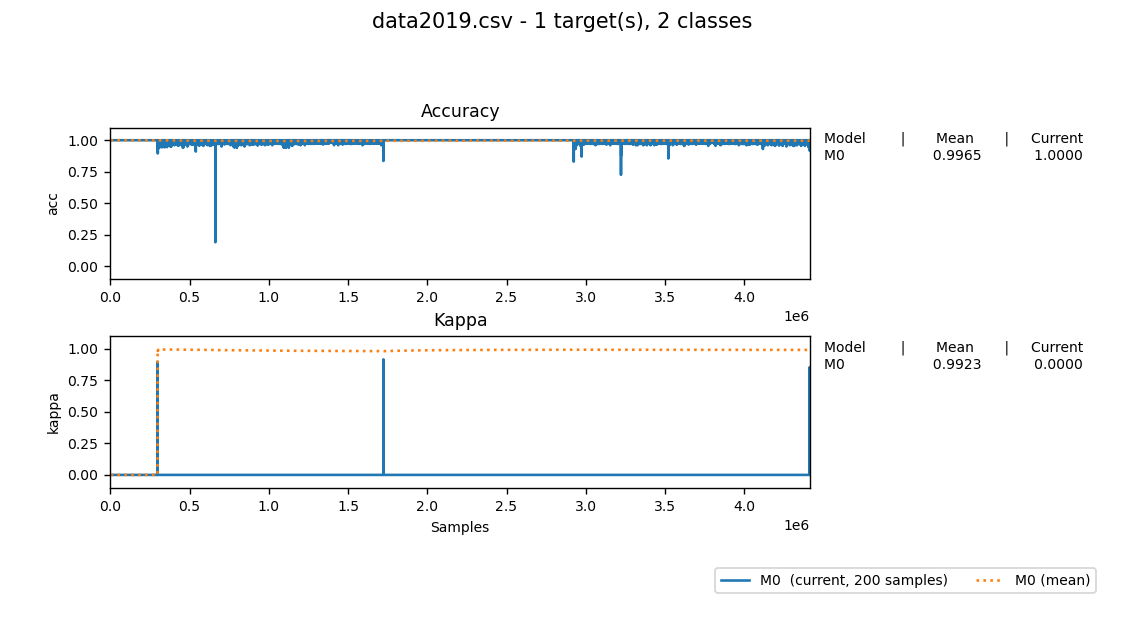

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [2538.23s]
Processed samples: 4415014
Mean performance:
M0 - Accuracy     : 0.9965
M0 - Kappa        : 0.9923


In [12]:
%matplotlib notebook
from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential

stream = FileStream("E:/Code/SWaT/data2019.csv")

# 2. Instantiate the HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()

evaluator = EvaluatePrequential(show_plot=True,
                                 pretrain_size=1000,
                                 max_samples=6000000)

ht_final_model = evaluator.evaluate(stream=stream, model=ht)